<a href="https://colab.research.google.com/github/Detonator1503/Final_projects/blob/main/Ml_project_spotify_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data
## Popularity of the song 

This data consist of the data of songs from 60s to 2010

The attributes are:

* uri: The Spotify ID for the track

* artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

* track_name: Name of the track

* duration_ms: The track length in milliseconds

* explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

* loudness: The overall loudness of a track in decibels (dB)

* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

* liveness: Detects the presence of an audience in the recording. Higher 
liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

* decade: Which decade it belongs to 

* popularity: The popularity of a track is a value between 0 and 1, where 0 is being not so popular and 1 being popular

* chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

* sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

The author's condition of a track being 'flop' is as follows:

        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The track must have 'US' as one of its markets.


Link for the dataset: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset?select=dataset-of-10s.csv

## Import Library

In [96]:
# important Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix 




## Loading Data

In [97]:
df = pd.read_csv("/content/drive/MyDrive/csvs/spotify_dataset.csv")
df.head()

track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0380         0.846          0.000004    0.1190    0.908   
3     0       0.1040         0.706          0.024600    0.0610    0.967   
4     0       0.1240         0.857          0.000872    0.2130    0.906   

     tempo  duration_ms  time_signature  chorus_hit  sections  popularity  \
0  185.655       173533               3    32.94975         9           1   
1  101.801       213613               4    48.82510        10           0   
2  115.940       223960               4    37.22663        12           0   
3  105.592       157907               4    24.75484         8           0   
4  114.617       245600               4    21.79874        14           0   

  decade  
0    60s  
1    60s  
2    60s  
3    60s  
4    60s

## EDA

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   uri               41099 non-null  object 
 3   danceability      41099 non-null  float64
 4   energy            41099 non-null  float64
 5   key               41099 non-null  int64  
 6   loudness          41099 non-null  float64
 7   mode              41099 non-null  int64  
 8   speechiness       41099 non-null  float64
 9   acousticness      41099 non-null  float64
 10  instrumentalness  41099 non-null  float64
 11  liveness          41099 non-null  float64
 12  valence           41099 non-null  float64
 13  tempo             41099 non-null  float64
 14  duration_ms       41099 non-null  int64  
 15  time_signature    41099 non-null  int64  
 16  chorus_hit        41099 non-null  float6

In [99]:
df.describe()

danceability        energy           key      loudness          mode  \
count  41099.000000  41099.000000  41099.000000  41099.000000  41099.000000   
mean       0.539683      0.579544      5.213752    -10.221446      0.693375   
std        0.177808      0.252629      3.535060      5.311227      0.461098   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816500      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.375000      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41099.000000  41099.000000      41099.000000  41099.000000   
mean       0.072952      0.364232          0.154403      0.201534   
std        0.086106      0.338908          0.303518      0.172957   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061200      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41099.000000  41099.000000  4.109900e+04    41099.000000  41099.000000   
mean       0.542450    119.336349  2.348755e+05        3.893647     40.106896   
std        0.267333     29.099116  1.189696e+05        0.423072     19.006697   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.395500  1.729165e+05        4.000000     27.599510   
50%        0.559000    117.564000  2.179070e+05        4.000000     35.850270   
75%        0.768000    136.492000  2.667730e+05        4.000000     47.627240   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections    popularity  
count  41099.000000  41099.000000  
mean      10.475632      0.499964  
std        4.872026      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.000000  
75%       12.000000      1.000000  
max      169.000000      1.000000

In [100]:
# looking for Null value 
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
popularity          0
decade              0
dtype: int64

In [101]:
# In uri, artist, decade, track we can find null values lets check if there's any
for i in (df.select_dtypes(object)).columns:
  print(f"{i} == {df[i].unique()}")

track == ['Jealous Kind Of Fella' 'Initials B.B.' 'Melody Twist' ... 'Untouchable'
 'Lotus Flowers' 'Calling My Spirit']
artist == ['Garland Green' 'Serge Gainsbourg' 'Lord Melody' ... 'Regentum'
 'Liam Payne Featuring Quavo' 'The Neighbourhood']
uri == ['spotify:track:1dtKN6wwlolkM8XZy2y9C1'
 'spotify:track:5hjsmSnUefdUqzsDogisiX'
 'spotify:track:6uk8tI6pwxxdVTNlNOJeJh' ...
 'spotify:track:55qBw1900pZKfXJ6Q9A2Lc'
 'spotify:track:4o9npmYHrOF1rUxxTVH8h4'
 'spotify:track:2khIaVUkbMmDHB596lyMG3']
decade == ['60s' '70s' '80s' '90s' '00s' '10s']


In [102]:
df["artist"].value_counts()

Traditional          207
Harry Belafonte      140
P. Susheela          130
Ennio Morricone      128
Jerry Goldsmith      124
                    ... 
Voyce                  1
Johnny Laboriel        1
Tribe 8                1
Albert Burbank         1
The Neighbourhood      1
Name: artist, Length: 11902, dtype: int64

In [103]:
df["decade"].value_counts()

60s    8642
70s    7764
80s    6907
10s    6396
00s    5871
90s    5519
Name: decade, dtype: int64

In [104]:
df["track"].value_counts()

Falling                       17
Angel                         13
You                           12
Crazy                         12
Hold On                       12
                              ..
Thunder 6                      1
Big Blues                      1
Rockin' All Over The World     1
Siddhartha                     1
Calling My Spirit              1
Name: track, Length: 35853, dtype: int64

From above observation we can conclude that the most of the songs were created in 60s.

Lets visualize it 

<Axes: xlabel='decade', ylabel='count'>

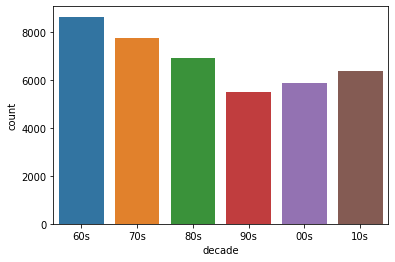

In [105]:
sns.countplot(x = df["decade"])

<Axes: xlabel='decade', ylabel='count'>

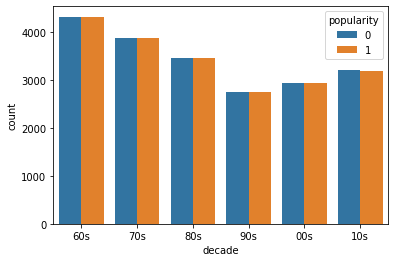

In [106]:
# Hit and flop in the decade 
sns.countplot(x = df["decade"], hue= df["popularity"])

<Axes: >

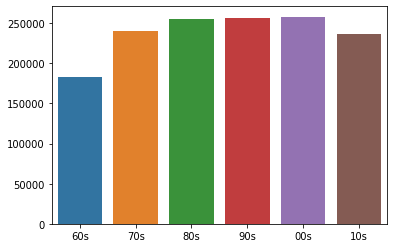

In [107]:
# What was the duration of the songs in a particular decade 
avg_duration = []
for i in df["decade"].unique():
  mean = df[df["decade"] == i]["duration_ms"].mean()
  avg_duration.append(mean)
sns.barplot(x = df["decade"].unique(), y = avg_duration)

<Axes: >

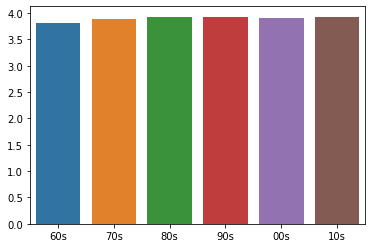

In [108]:
# Average Beats used in the decade
avg_beats = []
for i in df["decade"].unique():
  mean = df[df["decade"] == i]["time_signature"].mean()
  avg_beats.append(mean)
sns.barplot(x = df["decade"].unique(), y = avg_beats)

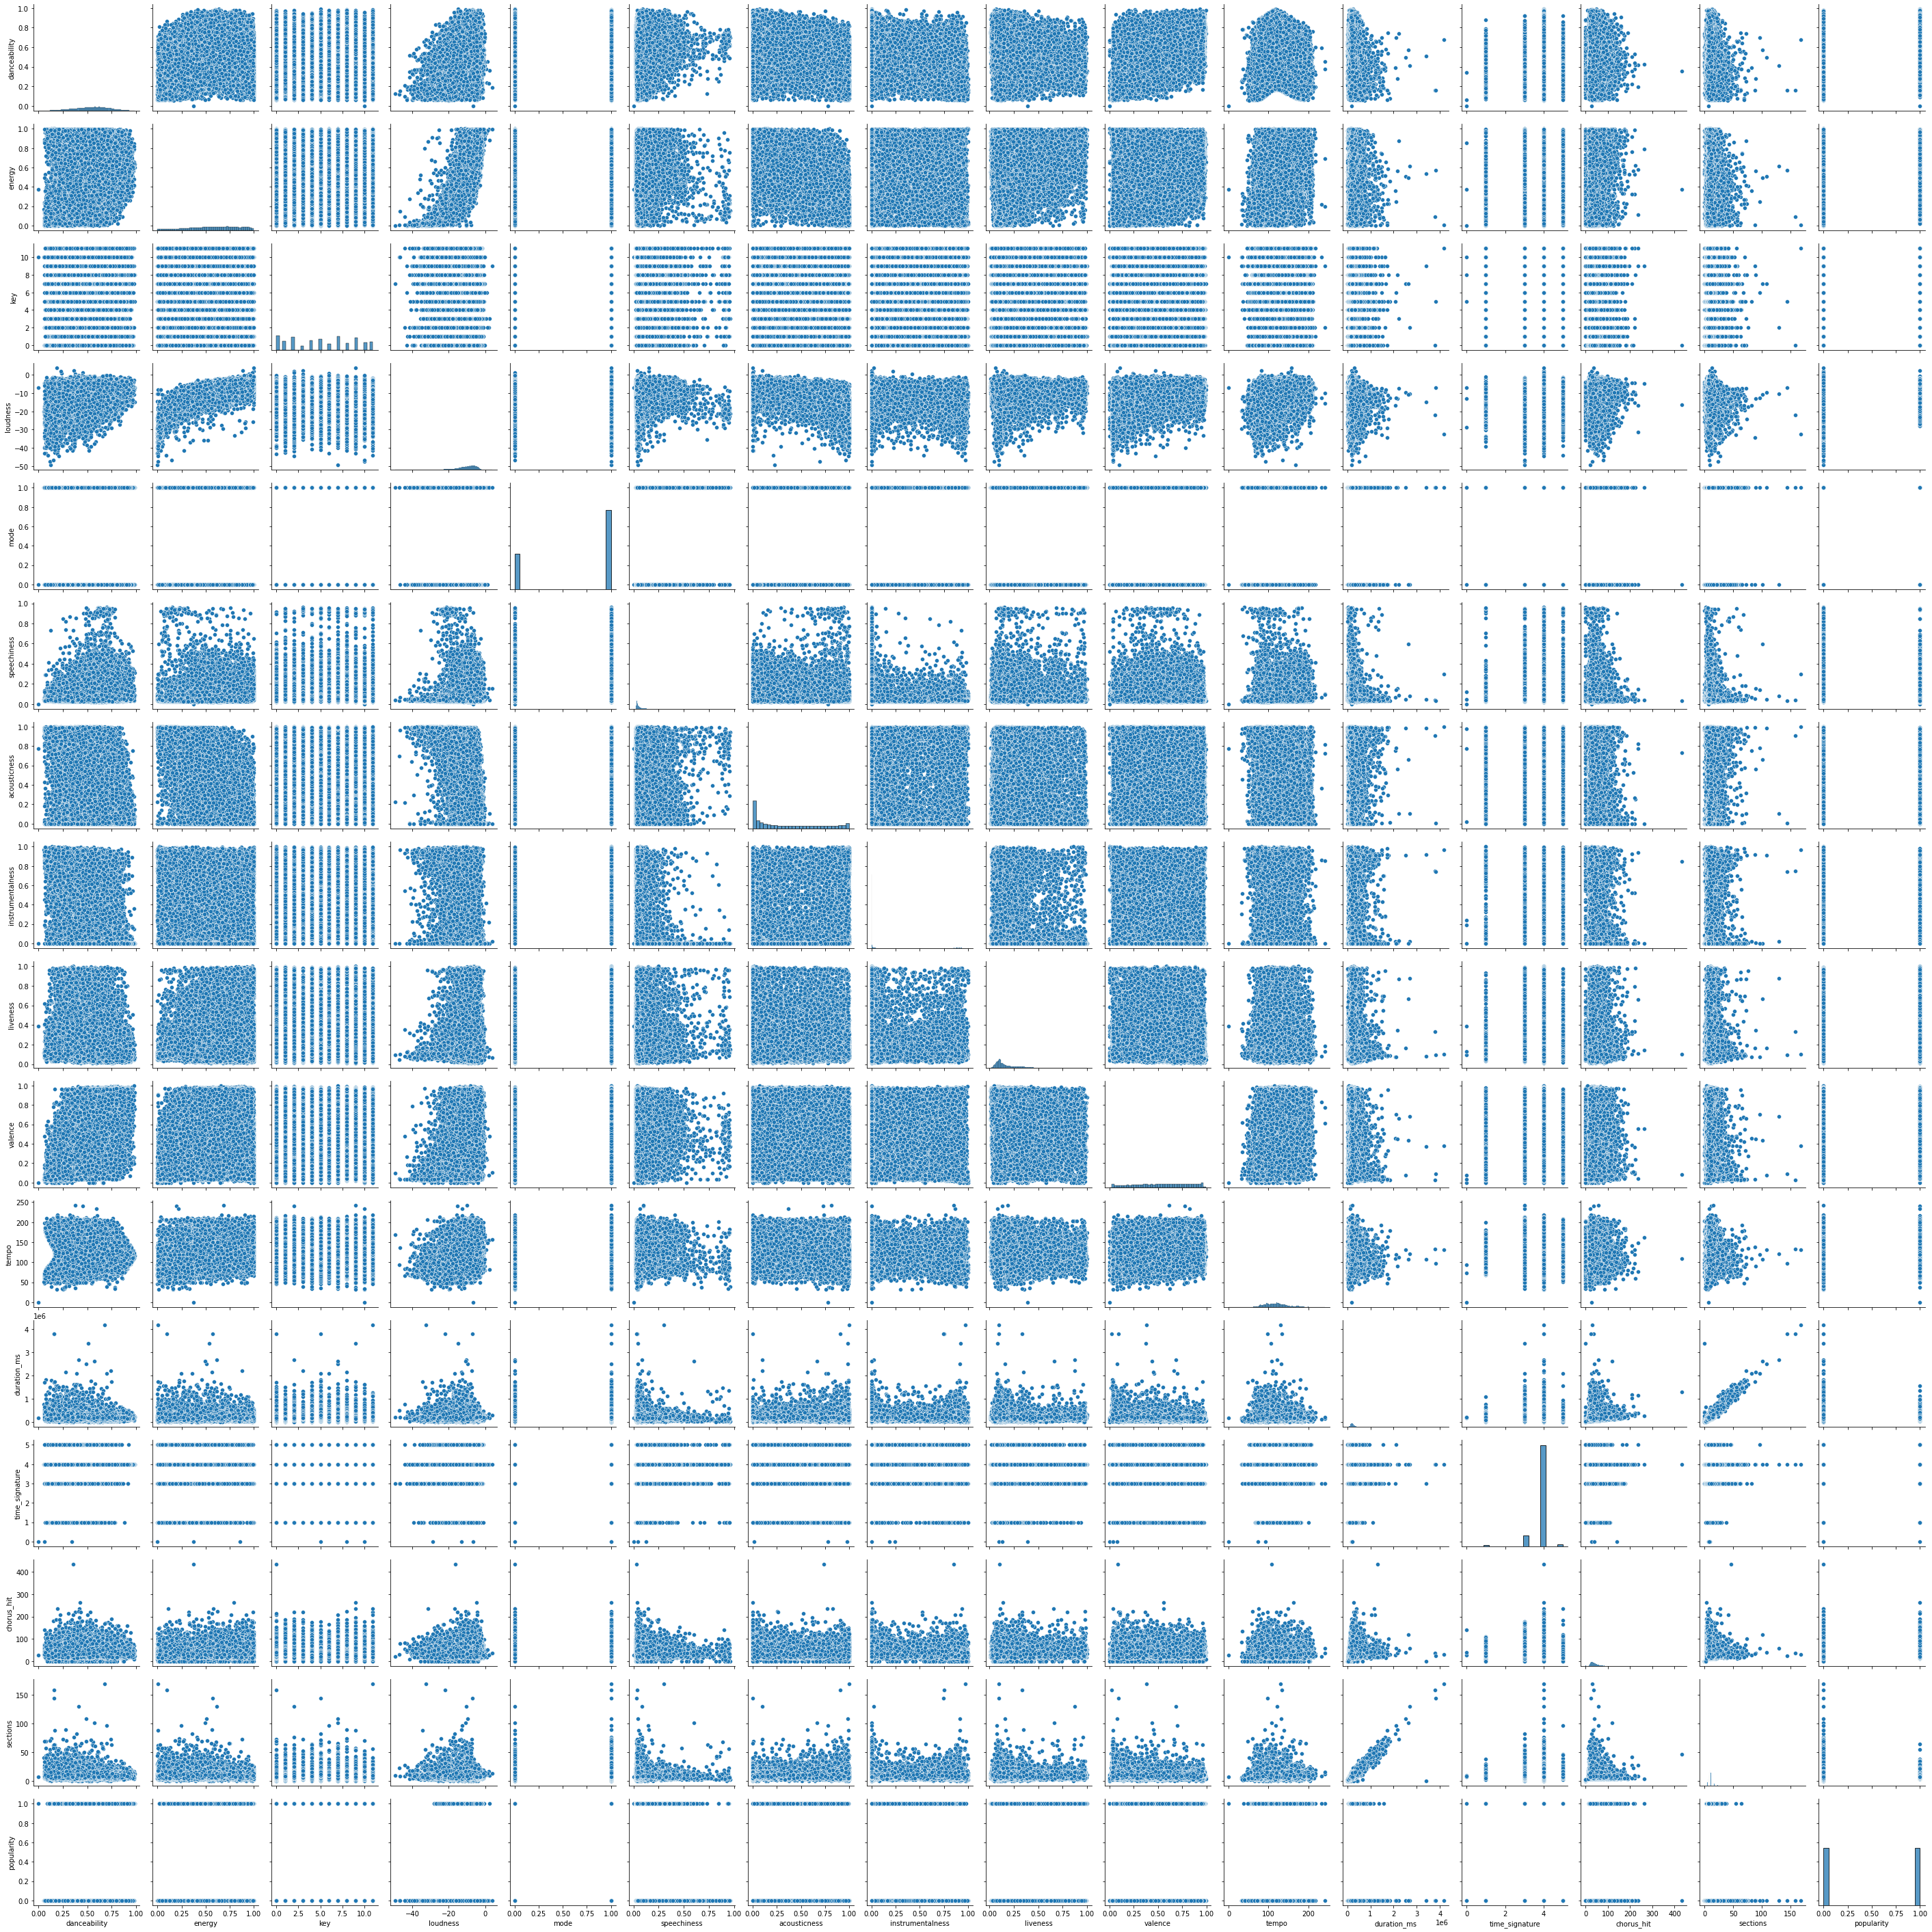

In [109]:
# Pairplot 
sns.pairplot(df)

In [110]:
# correlation of the columns 
df.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.206036  0.015433  0.273997 -0.032740   
energy                0.206036  1.000000  0.022598  0.772611 -0.033907   
key                   0.015433  0.022598  1.000000  0.008483 -0.140398   
loudness              0.273997  0.772611  0.008483  1.000000  0.000384   
mode                 -0.032740 -0.033907 -0.140398  0.000384  1.000000   
speechiness           0.156362  0.122360  0.026554  0.069115 -0.059758   
acousticness         -0.261122 -0.715084 -0.024240 -0.566503  0.050028   
instrumentalness     -0.301834 -0.208113 -0.013120 -0.374206 -0.075968   
liveness             -0.115275  0.157797  0.000639  0.086676  0.008781   
valence               0.553845  0.341398  0.007748  0.271706  0.035613   
tempo                -0.066588  0.224107  0.001116  0.169506  0.027088   
duration_ms          -0.062915  0.011961  0.015480 -0.049733 -0.074744   
time_signature        0.191814  0.196221  0.004756  0.165748 -0.009387   
chorus_hit           -0.036227  0.009660  0.010262 -0.013371 -0.022604   
sections             -0.058528 -0.040129  0.006771 -0.079946 -0.057016   
popularity            0.346020  0.177117  0.009923  0.285972  0.079633   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.156362     -0.261122         -0.301834 -0.115275   
energy               0.122360     -0.715084         -0.208113  0.157797   
key                  0.026554     -0.024240         -0.013120  0.000639   
loudness             0.069115     -0.566503         -0.374206  0.086676   
mode                -0.059758      0.050028         -0.075968  0.008781   
speechiness          1.000000     -0.083843         -0.084067  0.131381   
acousticness        -0.083843      1.000000          0.204083 -0.030731   
instrumentalness    -0.084067      0.204083          1.000000 -0.050554   
liveness             0.131381     -0.030731         -0.050554  1.000000   
valence              0.001521     -0.195296         -0.286977  0.000804   
tempo                0.036730     -0.179719         -0.053595  0.024766   
duration_ms          0.007708     -0.070389          0.106511  0.005373   
time_signature       0.021087     -0.188242         -0.078140  0.004804   
chorus_hit           0.012990     -0.012468          0.048695  0.037968   
sections            -0.008572     -0.016917          0.081167 -0.011708   
popularity          -0.040936     -0.245952         -0.407560 -0.051484   

                   valence     tempo  duration_ms  time_signature  chorus_hit  \
danceability      0.553845 -0.066588    -0.062915        0.191814   -0.036227   
energy            0.341398  0.224107     0.011961        0.196221    0.009660   
key               0.007748  0.001116     0.015480        0.004756    0.010262   
loudness          0.271706  0.169506    -0.049733        0.165748   -0.013371   
mode              0.035613  0.027088    -0.074744       -0.009387   -0.022604   
speechiness       0.001521  0.036730     0.007708        0.021087    0.012990   
acousticness     -0.195296 -0.179719    -0.070389       -0.188242   -0.012468   
instrumentalness -0.286977 -0.053595     0.106511       -0.078140    0.048695   
liveness          0.000804  0.024766     0.005373        0.004804    0.037968   
valence           1.000000  0.107952    -0.172097        0.155806   -0.059120   
tempo             0.107952  1.000000    -0.024366        0.007596   -0.056085   
duration_ms      -0.172097 -0.024366     1.000000        0.018342    0.093844   
time_signature    0.155806  0.007596     0.018342        1.000000   -0.011282   
chorus_hit       -0.059120 -0.056085     0.093844       -0.011282    1.000000   
sections         -0.133476  0.024868     0.888942        0.008334   -0.085965   
popularity        0.251117  0.032582    -0.073806        0.104941   -0.046416   

                  sections  popularity  
danceability     -0.058528    0.346020  
energy           -0.040

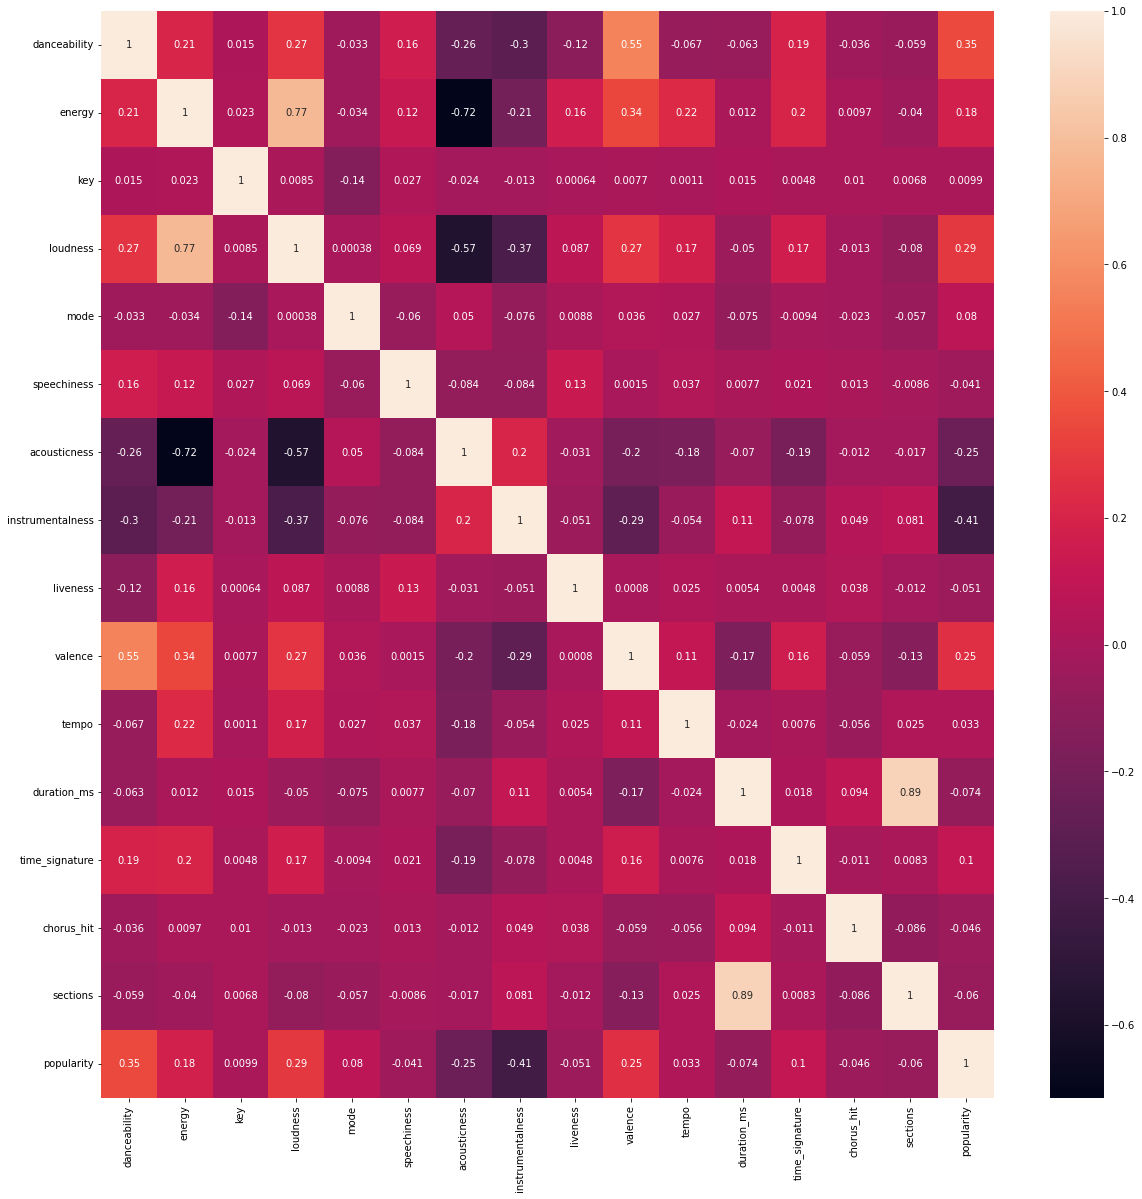

In [111]:
# plotting the correlation 
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show();

## Data Preprocessing

key == 0.011157699713670519


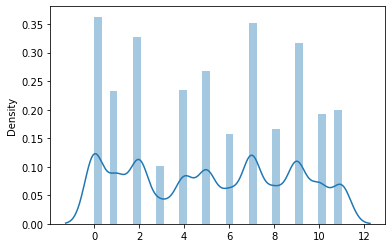

mode == -0.8387973976635904


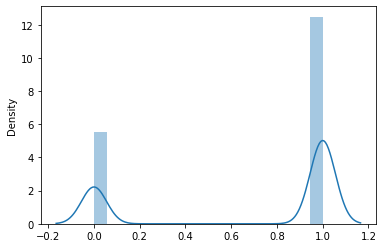

speechiness == 4.574612684822519


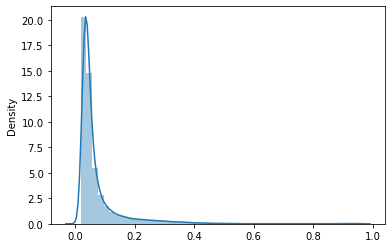

liveness == 2.123928265775796


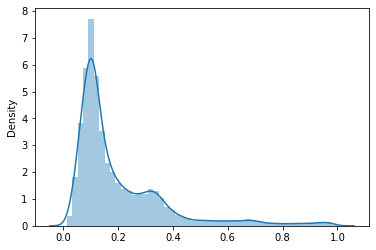

tempo == 0.4853292820744654


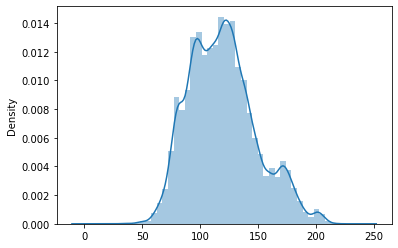

duration_ms == 6.821369343154787


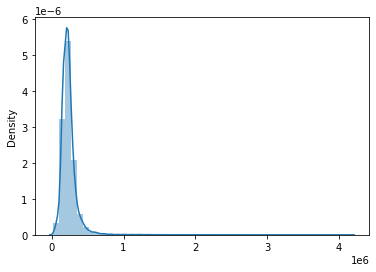

chorus_hit == 2.2152121884875444


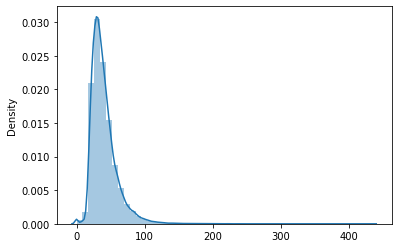

sections == 6.053934796333002


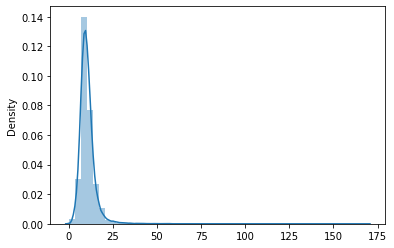

In [112]:
# Looking for the skewness 
for i in df[["key", "mode", "speechiness", "liveness", "tempo", "duration_ms", "chorus_hit", "sections"]]:
  print(i,"==", df[i].skew())
  plt.figure()
  sns.distplot(x =df[i])
  plt.show();

In [113]:
df[["mode", "speechiness", "liveness", "tempo", "duration_ms", "chorus_hit", "sections"]] = \
df[["mode", "speechiness", "liveness", "tempo", "duration_ms", "chorus_hit", "sections"]].apply(np.sqrt)

key == 0.011157699713670519


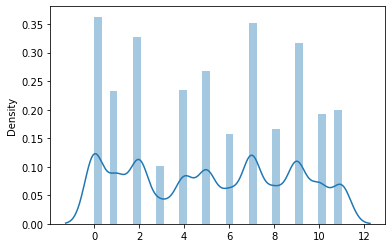

mode == -0.8387973976635904


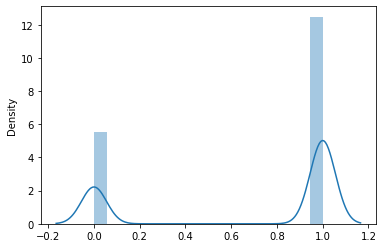

speechiness == 2.5792523055518566


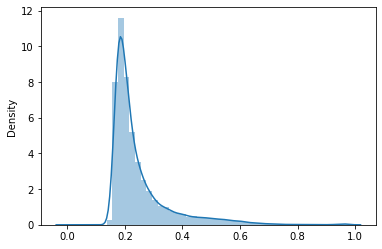

liveness == 1.2482419981649597


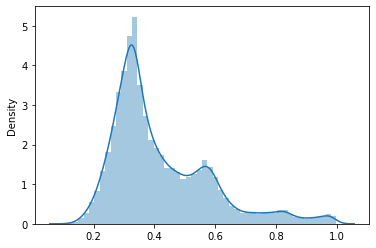

tempo == 0.16948403386601368


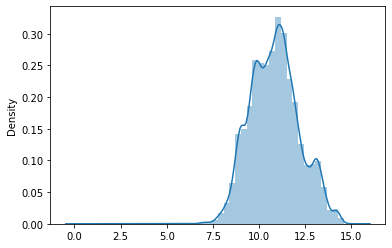

duration_ms == 1.9808512190607355


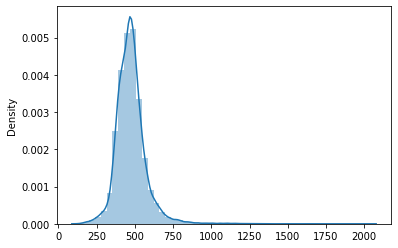

chorus_hit == 0.6957754623080006


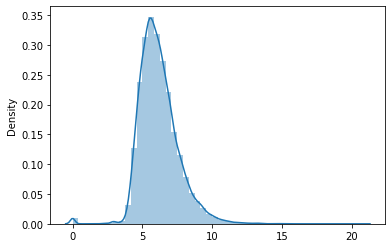

sections == 1.6395591756761163


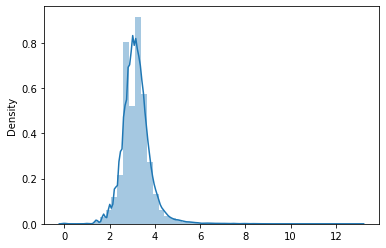

In [114]:
for i in df[["key", "mode", "speechiness", "liveness", "tempo", "duration_ms", "chorus_hit", "sections"]]:
  print(i,"==", df[i].skew())
  plt.figure()
  sns.distplot(x =df[i])
  plt.show();

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   uri               41099 non-null  object 
 3   danceability      41099 non-null  float64
 4   energy            41099 non-null  float64
 5   key               41099 non-null  int64  
 6   loudness          41099 non-null  float64
 7   mode              41099 non-null  float64
 8   speechiness       41099 non-null  float64
 9   acousticness      41099 non-null  float64
 10  instrumentalness  41099 non-null  float64
 11  liveness          41099 non-null  float64
 12  valence           41099 non-null  float64
 13  tempo             41099 non-null  float64
 14  duration_ms       41099 non-null  float64
 15  time_signature    41099 non-null  int64  
 16  chorus_hit        41099 non-null  float6

In [116]:
# encoding the data and standardizing the data 
oe = OrdinalEncoder()
ss = StandardScaler()
df[list(((df.select_dtypes("int64", "float64")).drop("popularity", axis = 1)).columns)] =\
ss.fit_transform(df[list(((df.select_dtypes("int64", "float64")).drop("popularity", axis = 1)).columns)])
df[list((df.select_dtypes(object)).columns)] = oe.fit_transform(df[list((df.select_dtypes(object)).columns)])


## Data Separation

In [117]:
# spliting the data into features and target 
x = df.drop("popularity", axis =1)
y = df.popularity

In [118]:
y

0        1
1        0
2        0
3        0
4        0
        ..
41094    0
41095    1
41096    1
41097    0
41098    0
Name: popularity, Length: 41099, dtype: int64

In [119]:
# Splitting the data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 23)


## Estimator Initializing

In [120]:
# Modeling 
models = {"RFC": RandomForestClassifier(),
          "DTC": DecisionTreeClassifier(),
          "LGR": LogisticRegression(),
          "SVC": SVC(),
          "KNN": KNeighborsClassifier(), 
          "XGC": XGBClassifier()}

In [121]:
# creating training and Evaluation function
def training_and_evaluation (model, model_name, xtrain = x_train, ytrain = y_train, xtest = x_test, ytest = y_test):
  """
  This function takes model and fit it with the training and testing data, 
  giving training and testing accuracy and visulaize the performance of the
  Model using confusion_matrix and Classification_report

  PRAMETERS:
  model : estimator
  model: Name of the Estimator
  xtrain : training Features
  ytrain: training target
  xtest: testing features
  ytest: testing target

  RESULT:
  training score 
  testing score 
  classification_report
  confusion matrix (heatmap)
  """
  print(model_name.center(25, "-"))
  # fitting the data 
  model.fit(xtrain, ytrain)
  
  # training score 
  print(f"training score = {model.score(xtrain, ytrain)}")

  # testing score
  print(f"testing score = {model.score(xtest, ytest)}")

  # classification_report
  print(classification_report(ytest, model.predict(xtest)))

  # confusion matrix
  plt.figure()
  sns.heatmap(confusion_matrix(ytest, model.predict(xtest)), annot = True)
  plt.show();


-----------RFC-----------
training score = 0.9999695854496792
testing score = 0.8098540145985401
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4041
           1       0.79      0.85      0.82      4179

    accuracy                           0.81      8220
   macro avg       0.81      0.81      0.81      8220
weighted avg       0.81      0.81      0.81      8220



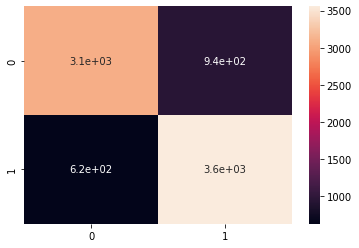

-----------DTC-----------
training score = 1.0
testing score = 0.7329683698296837
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4041
           1       0.74      0.73      0.74      4179

    accuracy                           0.73      8220
   macro avg       0.73      0.73      0.73      8220
weighted avg       0.73      0.73      0.73      8220



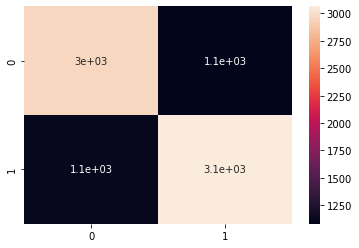

-----------LGR-----------
training score = 0.6391313604428358
testing score = 0.635036496350365
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      4041
           1       0.63      0.68      0.66      4179

    accuracy                           0.64      8220
   macro avg       0.64      0.63      0.63      8220
weighted avg       0.64      0.64      0.63      8220



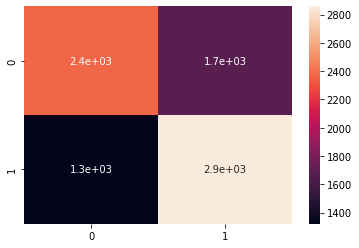

-----------SVC-----------
training score = 0.5242556038808966
testing score = 0.5126520681265206
              precision    recall  f1-score   support

           0       0.50      0.63      0.56      4041
           1       0.53      0.40      0.46      4179

    accuracy                           0.51      8220
   macro avg       0.52      0.51      0.51      8220
weighted avg       0.52      0.51      0.51      8220



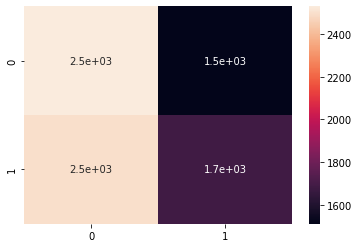

-----------KNN-----------
training score = 0.7130691322728794
testing score = 0.5375912408759124
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      4041
           1       0.55      0.54      0.54      4179

    accuracy                           0.54      8220
   macro avg       0.54      0.54      0.54      8220
weighted avg       0.54      0.54      0.54      8220



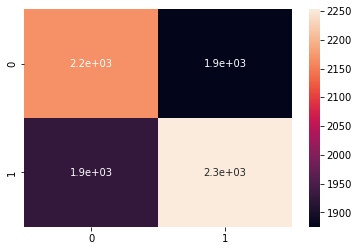

-----------XGC-----------
training score = 0.928586635846589
testing score = 0.8548661800486618
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4041
           1       0.84      0.89      0.86      4179

    accuracy                           0.85      8220
   macro avg       0.86      0.85      0.85      8220
weighted avg       0.86      0.85      0.85      8220



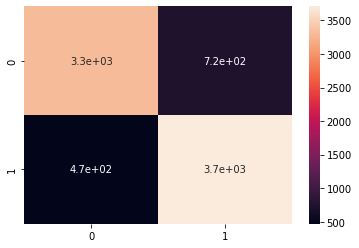

In [122]:
# initializing every model 
for name, i in models.items():
  training_and_evaluation(model = i, model_name = name)

After doing above experiments with the data and model we can see that the RandomForestClassifier, DecisionTreeClassifier and XGBClassifier are out performing the other classifiers.

including F1 score, Recall and Precision XGBClassifier and RandomForestClassifier have good score compared to teh DecisionTreeClassifier

But they are overfitting, hyperparameter tuning should solve the problem.

In [123]:
# Cross validation on the 3 Models (RandomForestClassifier, XGBClassifier, DecisionTreeClassifier)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(f"RandomForestClassifier : {cross_val_score(rfc, x, y, cv = 5).mean()}")

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
print(f"XGBClassifier : {cross_val_score(xgbc, x, y, cv = 5).mean()}")

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(f"DecisionTreeClassifier : {cross_val_score(dtc, x, y, cv = 5).mean()}")

RandomForestClassifier : 0.7735235045258909
XGBClassifier : 0.8026471391876102
DecisionTreeClassifier : 0.6956868468970923


Cross validation score for the Decision tree is quiet low so we will focus on the other 2 classifiers 
i.e RandomForestClassifier and XGBClassifier

## Hyperparameter Tunning

In [124]:
# RandomForestClassifier_param_dict
RFC_param_dict = {"n_estimators": np.arange(10,1000,50),
                  "max_depth":[None, 3,5,10],
                  "min_samples_split":np.arange(2,20,2),
                  "min_samples_leaf": np.arange(1,20,2)}

In [128]:
# XGBClassifier_param_dict
XGBC_param_grid = {'objective':['binary:logistic'],
                  'booster':['gbtree'],
                  'eval_metric':['auc'],
                  'tree_method':['hist'],
                  'grow_policy':['lossguide'],
                  'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
                  'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
                  'max_depth': [5,6,7,8,9,10,11,12,13,14],
                  'n_estimators': [50,65,80,100,115,130,150],
                  'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
                  'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [95]:
rscv_RFC = RandomizedSearchCV(RandomForestClassifier(), 
                              param_distributions = RFC_param_dict,
                              cv = 5,
                              random_state = 23)
rscv_RFC.fit(x_train, y_train)

rscv_RFC.best_params_

{'n_estimators': 360,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_depth': None}

In [129]:
rscv_xgbc = RandomizedSearchCV(XGBClassifier(), 
                               param_distributions= XGBC_param_grid, 
                               cv = 5,
                               random_state = 23)
rscv_xgbc.fit(x_train, y_train)
rscv_xgbc.best_params_

{'tree_method': 'hist',
 'reg_lambda': 0.8,
 'reg_alpha': 0,
 'objective': 'binary:logistic',
 'n_estimators': 65,
 'max_depth': 6,
 'learning_rate': 0.300000012,
 'grow_policy': 'lossguide',
 'gamma': 0.8,
 'eval_metric': 'auc',
 'booster': 'gbtree'}

-The Best Param Model RFC
training score = 0.9265184464247697
testing score = 0.8069343065693431
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      4041
           1       0.78      0.86      0.82      4179

    accuracy                           0.81      8220
   macro avg       0.81      0.81      0.81      8220
weighted avg       0.81      0.81      0.81      8220



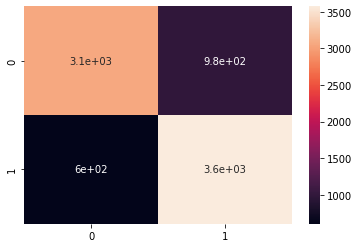

In [130]:
# randomforestclassifier on the best params
best_params_rfc = RandomForestClassifier(n_estimators = 360,
                                         min_samples_split = 18,
                                         min_samples_leaf = 3, 
                                         max_depth = None)

training_and_evaluation(best_params_rfc, model_name ="The Best Param Model RFC")


The Best Param Model XGBC
training score = 0.8949177286413821
testing score = 0.8355231143552312
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      4041
           1       0.81      0.88      0.84      4179

    accuracy                           0.84      8220
   macro avg       0.84      0.83      0.84      8220
weighted avg       0.84      0.84      0.84      8220



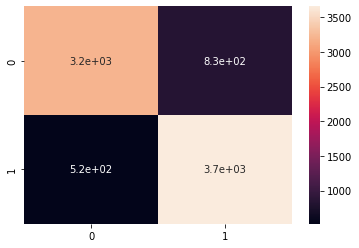

In [131]:
# xgboostClassifier on the best params
best_params_xgbc = XGBClassifier(tree_method = "hist",
                                 reg_lambda = 0.8,
                                 reg_alpha = 0,
                                 objective = "binary:logistic", 
                                 n_estimators = 65,
                                 max_depth = 6,
                                 learning_rate = 0.3,
                                 grow_policy = "lossguide",
                                 gamma = 0.8,
                                 eval_metric = "auc",
                                 booster = "gbtree")

training_and_evaluation(best_params_xgbc, model_name ="The Best Param Model XGBC")

we can consider XGBClassifier tuned model as the best model from the outcomes untill now 

with better Recall, F1 score and Precision scores.